<a href="https://colab.research.google.com/github/PiyushChall/Handwritten_Digit_Recognizer/blob/main/HandwrittenDigitRecognizer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Handwritten Digit Recognition with Neural Networks**





# Some Installations

In [ ]:
#!pip install torch

# Importing Modules

**Torch**

In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import DataLoader
from torchvision import datasets, transforms
from torchvision.utils import make_grid

**Numpy**

In [ ]:
import numpy as np

**Pandas**

In [ ]:
import pandas as pd

**Confusion Matrix**

In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

**Matplot**

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

**Time**

In [ ]:
import time

In [ ]:
import cv2

# Using GPU if availabble

In [ ]:
device = (
    "cuda"
    if torch.cuda.is_available()
    else "mps"
    if torch.backends.mps.is_available()
    else "cpu"
)

In [ ]:
device

'cpu'

# Converting image to Tensor

In [ ]:
transform = transforms.ToTensor()

# Load Data

**Train Data**

In [ ]:
train_data = datasets.MNIST(root = "Digit_data", train = True, download = True, transform = transform)

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 9912422/9912422 [00:00<00:00, 104029523.72it/s]


Extracting Digit_data/MNIST/raw/train-images-idx3-ubyte.gz to Digit_data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 28881/28881 [00:00<00:00, 5984078.14it/s]

Extracting Digit_data/MNIST/raw/train-labels-idx1-ubyte.gz to Digit_data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 1648877/1648877 [00:00<00:00, 88870359.76it/s]


Extracting Digit_data/MNIST/raw/t10k-images-idx3-ubyte.gz to Digit_data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 4542/4542 [00:00<00:00, 1147483.96it/s]

Extracting Digit_data/MNIST/raw/t10k-labels-idx1-ubyte.gz to Digit_data/MNIST/raw



**Test Data**

In [ ]:
test_data = datasets.MNIST(root = "Digit_data", train = False, download = True, transform = transform)

In [ ]:
train_data

Dataset MNIST
    Number of datapoints: 60000
    Root location: Digit_data
    Split: Train
    StandardTransform
Transform: ToTensor()

In [ ]:
test_data

Dataset MNIST
    Number of datapoints: 10000
    Root location: Digit_data
    Split: Test
    StandardTransform
Transform: ToTensor()

# Creating Small Batches of data

In [ ]:
train_loader = DataLoader(train_data, batch_size = 10, shuffle = 1)
test_loader = DataLoader(test_data, batch_size = 10, shuffle = 0)

# Creating model

In [ ]:
class cnn_model(nn.Module):
  def __init__(self):
    super().__init__()
    self.conv1 = nn.Conv2d(1, 6, 3, 1)
    self.conv2 = nn.Conv2d(6, 16, 3, 1)
    self.fc1 = nn.Linear(5*5*16, 100)
    self.fc2 = nn.Linear(100, 50)
    self.fc3 = nn.Linear(50, 10)

  def forward(self, x):
    x = F.relu(self.conv1(x))
    x = F.max_pool2d(x, 2, 2)
    x = F.relu(self.conv2(x))
    x = F.max_pool2d(x, 2, 2)
    x = x.view(-1, 16*5*5)
    x = F.relu(self.fc1(x))
    x = F.relu(self.fc2(x))
    x = self.fc3(x)

    return F.log_softmax(x, dim = 1)

# Picking a Seed and Initiating model

In [ ]:
torch.manual_seed(10)
model = cnn_model()

In [ ]:
model

cnn_model(
  (conv1): Conv2d(1, 6, kernel_size=(3, 3), stride=(1, 1))
  (conv2): Conv2d(6, 16, kernel_size=(3, 3), stride=(1, 1))
  (fc1): Linear(in_features=400, out_features=100, bias=True)
  (fc2): Linear(in_features=100, out_features=50, bias=True)
  (fc3): Linear(in_features=50, out_features=10, bias=True)
)

# Loss function

In [ ]:
Lossfun = nn.CrossEntropyLoss()

# Optimizer

In [ ]:
optimizer = torch.optim.Adam(model.parameters(), lr = 0.01)

# Start training and testing

In [ ]:
start_time = time.time()

epochs = 5
train_losses = []
test_losses = []
train_correct = []
test_correct = []

for epoch in range(epochs):
  trn_correct = 0
  tst_correct = 0
  for batch, (X_train, Y_train) in enumerate(train_loader):
    batch += 1
    Y_pred = model(X_train)
    loss = Lossfun(Y_pred, Y_train)

    prediction = torch.max(Y_pred.data, 1)[1]
    batch_correct = (prediction == Y_train).sum()
    trn_correct += batch_correct

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    if batch % 600 == 0:
      print(f'Epochs: {epoch}  Batch: {batch} loss: {loss.item()}')
  train_losses.append(loss.item())
  train_correct.append(trn_correct)


  with torch.no_grad():
    for batch, (X_test, Y_test) in enumerate(test_loader):
      batch += 1
      Y_val = model(X_test)
      predicted = torch.max(Y_val.data, 1)[1]
      tst_correct = (prediction == Y_test).sum()

  loss = Lossfun(Y_val, Y_test)
  test_losses.append(loss)
  test_correct.append(tst_correct)

current_time = time.time()
total_time = current_time - start_time
print(f'Traing took: {total_time/60} minutes')

Epochs: 0  Batch: 600 loss: 0.036729034036397934
Epochs: 0  Batch: 1200 loss: 0.008785316720604897
Epochs: 0  Batch: 1800 loss: 0.019138216972351074
Epochs: 0  Batch: 2400 loss: 0.40183743834495544
Epochs: 0  Batch: 3000 loss: 0.044860485941171646
Epochs: 0  Batch: 3600 loss: 0.09562231600284576
Epochs: 0  Batch: 4200 loss: 0.0022700554691255093
Epochs: 0  Batch: 4800 loss: 0.07522408664226532
Epochs: 0  Batch: 5400 loss: 0.0958254486322403
Epochs: 0  Batch: 6000 loss: 0.023585466668009758
Epochs: 1  Batch: 600 loss: 0.03604504466056824
Epochs: 1  Batch: 1200 loss: 2.2823822498321533
Epochs: 1  Batch: 1800 loss: 0.0012174579314887524
Epochs: 1  Batch: 2400 loss: 1.535473346710205
Epochs: 1  Batch: 3000 loss: 0.0025779828429222107
Epochs: 1  Batch: 3600 loss: 0.48648756742477417
Epochs: 1  Batch: 4200 loss: 0.0008337073959410191
Epochs: 1  Batch: 4800 loss: 0.07344252616167068
Epochs: 1  Batch: 5400 loss: 0.00991871953010559
Epochs: 1  Batch: 6000 loss: 0.3563772439956665
Epochs: 2  Bat

In [ ]:
test_losses

[tensor(0.0097),
 tensor(7.5815e-05),
 tensor(0.0015),
 tensor(0.0006),
 tensor(0.0089)]

In [ ]:
train_losses

[0.023585466668009758,
 0.3563772439956665,
 0.0015078919241204858,
 0.014003979042172432,
 0.12881384789943695]

# Visualizing

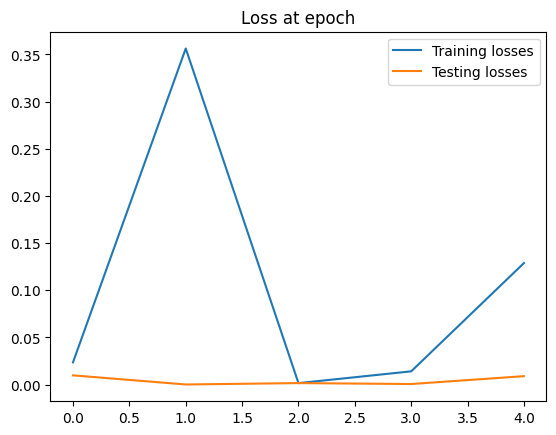

In [ ]:
train_losses = [tl for tl in train_losses]
plt.plot(train_losses, label = "Training losses")
plt.plot(test_losses, label = "Testing losses")
plt.title("Loss at epoch")
plt.legend()